In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
# 参数设置
delta_c = 1.686
dS = 0.01
S_max = 100
num_walks = 50000

# 存储首次穿越的S值
first_crossing_S = []

for _ in range(num_walks):
    delta = 0.0
    S = 0.0
    while S <= S_max:
        delta += np.random.normal(0, np.sqrt(dS))
        S += dS
        if delta >= delta_c:
            first_crossing_S.append(S)
            break

# 统计直方图
bins = np.arange(0, S_max + dS, dS)
hist, bin_edges = np.histogram(first_crossing_S, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 理论曲线
S_values = np.linspace(dS, S_max, 1000)
#f_theory = (delta_c / np.sqrt(2 * np.pi * S_values**3)) * np.exp(-delta_c**2 / (2 * S_values))
def theory_func(s):
    return delta_c/np.sqrt(2*np.pi*s**3)*np.exp(-delta_c**2/(2*s))

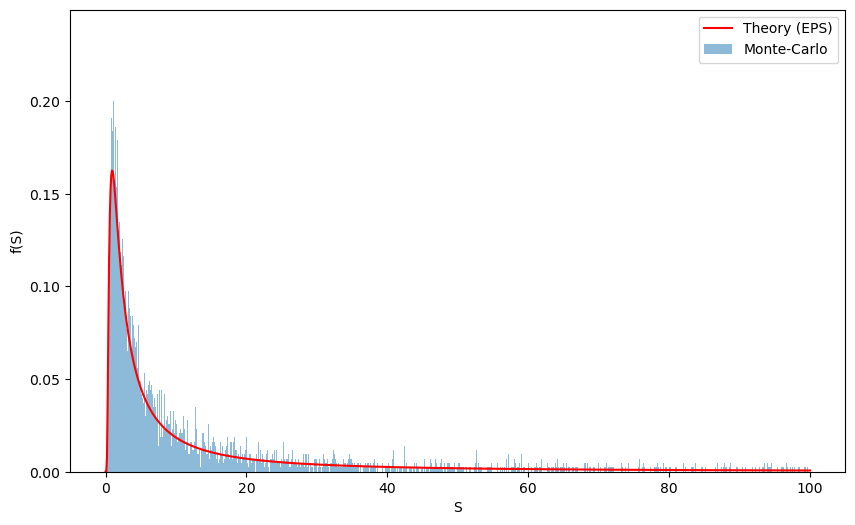

In [6]:
# 绘图
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=dS, alpha=0.5, label='Monte-Carlo')
plt.plot(S_values, theory_func(S_values), 'r-', label='Theory (EPS)')
plt.xlabel('S')
plt.ylabel('f(S)')
plt.legend()
#plt.title('First Crossing Distribution: Simulation vs Theory')
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/HW6_Monte_Carlo.pdf')
plt.show()

In [7]:
print(quad(theory_func, S_values[0], S_values[-1]))
print(np.trapz(hist, bin_centers))

(0.8661112805621307, 2.5552575787837187e-11)
1.0000000000000016
